## The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning, 2020 Semester 2
-----
## Project 1: Predicting stroke with Naive Bayes and K-NN
-----
###### Student Name(s):
###### Python version:
###### Submission deadline: 

This iPython notebook is a template which you will use for your Project 1 submission. 

Marking will be applied on the functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 

In [4]:
# This function should transform data into a usable format 
import pandas as pd
def preprocess(csvFilename):
    data = pd.read_csv(csvFilename)
    return data

In [5]:
# This function should split a data set into a training set and hold-out test set
from sklearn.model_selection import train_test_split
def split_data(data):
    features = data.iloc[:,: -1]
    label = data.iloc[:, -1]
    # train_test_split(feature, label, test_size = 0-1)
    # return x_train, x_test, y_train, y_test.
    return train_test_split(features, label, test_size = 0.25) # 0.7, 0.5 

In [11]:
data = preprocess("stroke_update.csv")
import numpy as np
categorical = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
for cate in categorical:
    dic = {label:idx for idx,label in enumerate(np.unique(data[cate]))}
    data[cate] = data[cate].map(dic)
numerical = ["avg_glucose_level", "bmi", "age"]
for num in numerical:
    data[num] = pd.cut(data[num], 10, labels = range(10)) #9, 8
x_train, x_test, y_train, y_test = split_data(data)

In [12]:
probInTrain = train(x_train, y_train)
y_predict = predict(probInTrain, x_test)
evaluate(y_test, y_predict)

NameError: name 'evaluate' is not defined

In [13]:
train(x_train, y_train)

0
     avg_glucose_level bmi age  gender  hypertension  heart_disease  \
1345                 1   2   7       0             0              0   
1811                 3   3   5       0             0              0   
602                  0   3   4       0             0              0   
2045                 0   2   5       0             1              0   
1227                 2   2   6       1             1              0   
...                ...  ..  ..     ...           ...            ...   
2060                 6   4   6       1             0              0   
1965                 2   4   5       0             0              0   
535                  2   3   1       1             0              0   
2002                 0   4   1       0             0              0   
653                  6   5   9       0             1              0   

      ever_married  work_type  Residence_type  smoking_status  stroke  
1345             1          0               0               0       0  
1

{0: {'countNum': 1652,
  'prob': 0.8038929440389294,
  'probFeatures': {'avg_glucose_level': {1: 0.35018050541516244,
    0: 0.24608904933814682,
    2: 0.18170878459687123,
    3: 0.05956678700361011,
    7: 0.05054151624548736,
    6: 0.040312876052948254,
    5: 0.025872442839951864,
    4: 0.022262334536702767,
    8: 0.018050541516245487,
    9: 0.005415162454873646},
   'bmi': {2: 0.35980746089049337,
    3: 0.2833935018050541,
    4: 0.14019253910950663,
    1: 0.12876052948255115,
    5: 0.04693140794223827,
    6: 0.019855595667870037,
    7: 0.010830324909747292,
    0: 0.006618531889290012,
    9: 0.0018050541516245488,
    8: 0.0018050541516245488},
   'age': {4: 0.13176895306859207,
    5: 0.12515042117930206,
    7: 0.1125150421179302,
    6: 0.11131167268351384,
    3: 0.10709987966305656,
    2: 0.10048134777376655,
    9: 0.09927797833935018,
    1: 0.09085439229843562,
    8: 0.06919374247894103,
    0: 0.052346570397111915},
   'gender': {0: 0.6051995163240629, 1: 0.

In [99]:
def CNB(trainX, trainY):
    from sklearn.naive_bayes import CategoricalNB
    cnb = CategoricalNB(alpha = 1.0)
    cnb.fit(trainX, trainY)
    return cnb
cnb = CNB(x_train, y_train)
y_predict_cnb = cnb.predict(x_test)
evaluate(y_test, y_predict_cnb)

0.7824817518248175

In [6]:
# This function should build a supervised NB model
def train(x_train, y_train):
    probInTrain = {}
    
    for yClass, yCount in y_train.value_counts().items():
        probInTrain[yClass] = {'countNum': yCount, 'prob': yCount/len(y_train), 'probFeatures': {}}
        
    train_Data = pd.concat([x_train, y_train], axis = 1)
    
    numOfFeatures = {}
    for oneFeature in x_train.columns:
        numOfFeatures[oneFeature] = x_train[oneFeature].value_counts().index
    
    ##for yClass, group in train_Data.groupby(y_train.values):
    for yClass, group in train_Data.groupby("stroke"):
        for oneFeature in x_train.columns:
            probForOneFeature = {}
            featureSummary = group[oneFeature].value_counts()
            
            for oneFeatureName in numOfFeatures[oneFeature]:
                if not oneFeatureName in featureSummary:
                    featureSummary[oneFeatureName] = 0
            
            for featureValue, featureCount in featureSummary.items():
                featureProb = (featureCount + 1) / (group[oneFeature].size + len(numOfFeatures[oneFeature]))
                probForOneFeature[featureValue] = featureProb
            
            probInTrain[yClass]['probFeatures'][oneFeature] = probForOneFeature
    
    return probInTrain

In [7]:
# This function should predict the class for an instance or a set of instances, based on a trained model 
def predict(probInTrain, x_test):
    y_predict = []
    for i in range(0, len(x_test)):
        instance = x_test.iloc[i]
        maxRate = 0
        classSelect = None
        for yClass, yInfo in probInTrain.items():
            rate = yInfo['prob']
            probFeatures = yInfo['probFeatures']
            for oneFeature, proForOneFeature in probFeatures.items():
                rate *= proForOneFeature.get(instance[oneFeature])
            if maxRate == 0 or rate > maxRate:
                maxRate = rate
                classSelect = yClass
        y_predict.append(classSelect)
    
    return y_predict

In [19]:
# This function should evaluate a set of predictions in terms of metrics
from sklearn.metrics import f1_score, recall_score, precision_score
def evaluate(y_test, y_predict):
    correct = 0
    for i in range(0, len(y_test)):
        if y_test.values[i] == y_predict[i]:
            correct += 1
    f1_score = f1_score(y_test, y_predict, average = 'binary')
    return f1_score
    #print(correct / len(y_test))
    #print(precision_score(y_test, y_predict, average = 'binary'))
    #print(recall_score(y_test, y_predict, average = 'binary'))
    #print(f1_score(y_test, y_predict, average = 'binary')

In [ ]:
TP = 0
for i in range(0, len(y_test)):
    if y_test.values[i] == y_predict[i] & y_test.values[i] == 1:
        TP += 1
print(TP)
print(TP / y_test.value_counts()[1])
print(TP / y_predict.count(1))

## Questions (you may respond in a cell or cells below):

You should respond to questions 1-4. In question 2 (b) you can choose between two options. A response to a question should take about 100--200 words, and make reference to the data wherever possible.

### Question 1: Data exploration

- a) Explore the data and summarise different aspects of the data. Can you see any interesting characteristic in features, classes or categories? What is the main issue with the data? Considering the issue, how would the Naive Bayes classifier work on this data? Discuss your answer based on the Naive Bayes' formulation.
- b) Is accuracy an appropriate metric to evaluate the models created for this data? Justify your answer. Explain which metric(s) would be more appropriate, and contrast their utility against accuracy. [no programming required]



Explore: 读入。Summarise：2740, 10features, 1 label, 7名义，3——2个。 label
interest: stroke,
问题：关联性，数据转化，corr（）， 协方差，///贝叶斯——连续性数据。高斯分布，等宽，等频率，K-means。
P(x1, x2, ..., xM |y)P(y) ≈ P(x1|y)P(x2|y)...P(xM |y)P(y)，这个转换过程要求了x之间相互独立。解决后者，将连续性数据转化成离散性数据，等区间划分，预估正态分布，使用正态分布的概率密度函数来代替概率。

准确率不合适，生病模型。有-->没 后果 >> 没-->有。关心有病的当中，有多少确诊。确诊的人当中，有多少人有病。希望同大，F1-score 棒棒。

In [10]:
age = data.loc[:, "age"]
print(age.max())
print(age.min())
print(age.mean())

82
10
51.59343065693431


In [12]:
gender = data.loc[:, "gender"]
gender.value_counts()

Female    1659
Male      1081
Name: gender, dtype: int64

In [14]:
work_type = data.iloc[:, 7]
work_type.value_counts()

Private          1742
Self-employed     577
Govt_job          366
children           49
Never_worked        6
Name: work_type, dtype: int64

In [22]:
import numpy as np
categorical = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
for cate in categorical:
    dic = {label:idx for idx,label in enumerate(np.unique(data[cate]))}
    data[cate] = data[cate].map(dic)
numerical = ["avg_glucose_level", "bmi", "age"]
for num in numerical:
    data[num] = pd.cut(data[num], 10, labels = range(10)) #9, 8
data

,avg_glucose_level,bmi,age,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,3,2,5,1,0,0,1,3,0,2,0
1,0,2,4,0,0,0,1,2,0,1,0
2,1,5,5,0,0,0,0,2,1,1,0
3,1,2,2,0,0,0,0,2,1,1,0
4,1,3,8,1,0,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2735,1,4,9,1,0,1,1,3,1,1,1
2736,1,2,9,1,0,0,1,3,0,0,1
2737,1,3,6,0,0,0,1,2,0,2,1
2738,0,2,9,0,0,0,1,3,1,1,1


In [24]:
import pandas as pd
data = preprocess("stroke_update.csv")
data = pd.get_dummies(data)
data

,avg_glucose_level,bmi,age,hypertension,heart_disease,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,137.45,26.0,53,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,56.85,24.4,44,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,87.79,41.1,49,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
3,94.82,22.9,28,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
4,96.80,29.6,73,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,88.29,36.0,79,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0
2736,93.38,26.7,76,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
2737,83.27,32.9,56,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2738,75.91,26.7,80,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [25]:
data = preprocess("stroke_update.csv")
data

,avg_glucose_level,bmi,age,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,137.45,26.0,53,Male,0,0,Yes,Self-employed,Rural,smokes,0
1,56.85,24.4,44,Female,0,0,Yes,Private,Rural,never smoked,0
2,87.79,41.1,49,Female,0,0,No,Private,Urban,never smoked,0
3,94.82,22.9,28,Female,0,0,No,Private,Urban,never smoked,0
4,96.80,29.6,73,Male,0,0,Yes,Private,Urban,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
2735,88.29,36.0,79,Male,0,1,Yes,Self-employed,Urban,never smoked,1
2736,93.38,26.7,76,Male,0,0,Yes,Self-employed,Rural,formerly smoked,1
2737,83.27,32.9,56,Female,0,0,Yes,Private,Rural,smokes,1
2738,75.91,26.7,80,Female,0,0,Yes,Self-employed,Urban,never smoked,1


### Question 2: Naive Bayes concepts and formulation

- a) Explain the independence assumption underlying Naive Bayes. What are the advantages and disadvantages of this assumption? Elaborate your answers using the features of the provided data. [no programming required]
- b) Implement the Naive Bayes classifier. You need to decide how you are going to apply Naive Bayes for nominal and numeric attributes. You can combine both Gaussian and Categorical Naive Bayes (option 1) or just using Categorical Naive Bayes (option 2). Explain your decision. For Categorical Naive Bayes, you can choose either epsilon or Laplace smoothing for this calculation. Evaluate the classifier using accuracy and appropriate metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Explain the difference between epsilon and Laplace smoothing. [no programming required]

In [ ]:
什么事独立性假设。
优点：简化了模型。实现更方便。4个features，1/0，joint P 2^4很难，都是0.
缺点：因为现实中！！！！两者独立，模型本身自带偏差。
大多数0-0.1，一部分弱相关，不太合理。age - married 较强关联。

In [ ]:
Option2: code above Laplace

In [ ]:
epsilon: 简单， 总概率略大于1，ε很小，所以并不改变原先的分。
laplace：pseudocount的平滑方法，好处，概率1，缺点，当数据量较小时，严重影响数据分布。

In [73]:
y_zero_R = []
print(y_test.value_counts())
for i in range(0, len(y_test)):
    y_zero_R.append(0)


0    557
1    128
Name: stroke, dtype: int64


### Question 3: Model Comparison
- a) Implement the K-NN classifier, and find the optimal value for K. 
- b) Based on the obtained value for K in question 4 (a), evaluate the classifier using accuracy and chosen metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Is K-NN sensitive to imbalanced data? Justify your answer. [no programming required]
- d) Compare the classifiers (Naive Bayes and K-NN) based on metrics' results. Provide a comparatory discussion on the results. [no programming required]

In [ ]:
a）最优？？？
c) KNN 很明显的对异常数据不敏感的ML

In [90]:
def KNN(trainX, trainY, num_K):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = num_K)
    knn.fit(trainX, trainY)
    return knn
knn = KNN(x_train, y_train, 34)
y_predict_knn = knn.predict(x_test)
evaluate(y_test, y_predict_knn)

0.8262773722627738

max acc :-  0.8262773722627738 at K =  34


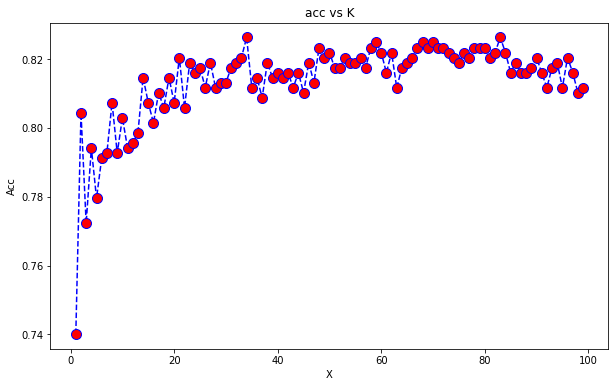

In [89]:
import matplotlib.pyplot as plt
acc = []
from sklearn import metrics
for i in range(1, 100):
    knn = KNN(x_train, y_train, i)
    y_predict_knn = knn.predict(x_test)
    acc.append(evaluate(y_test, y_predict_knn))

plt.figure(figsize = (10,6))
plt.plot(range(1,100), acc, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('acc vs K')
plt.xlabel('X')
plt.ylabel('Acc')
print("max acc :- ", max(acc), "at K = ", acc.index(max(acc)) + 1)